In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

In [81]:
# set default values
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)
mpl.rc('figure', figsize=(20, 8))

In [82]:
df = pd.read_csv('../data/cars1920.csv')
df['speed-sq'] = df['speed']**2
df.head()

,speed,dist,speed-sq
0,4,2,16
1,4,10,16
2,7,4,49
3,7,22,49
4,8,16,64


In [83]:
x = [[x] for x in df['speed'].values]
y = df['dist'].values

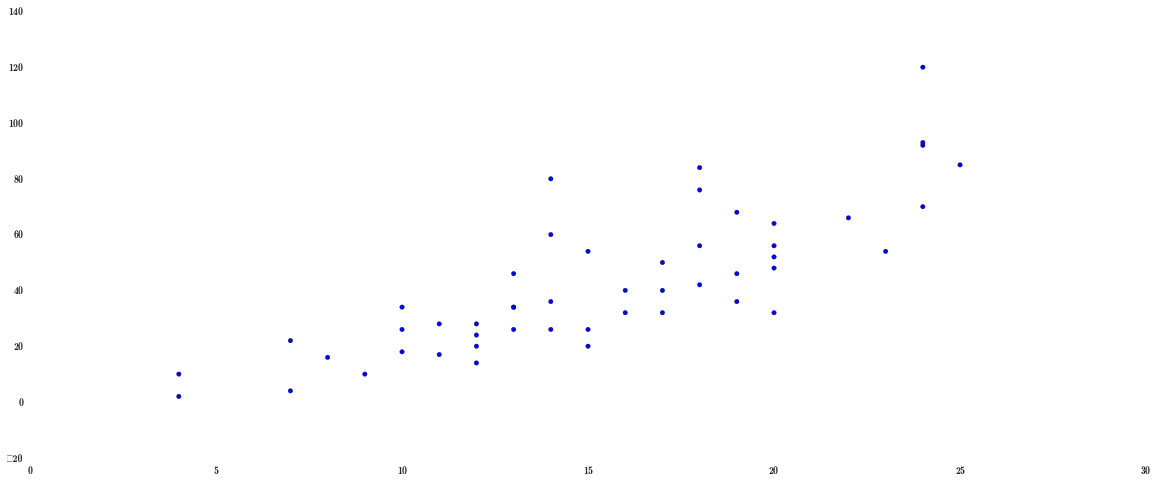

In [84]:
plt.scatter(x,y)

In [85]:
regr = linear_model.LinearRegression()

In [86]:
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [87]:
print "coef: %s" %regr.coef_
print "score: %0.5f" %regr.score(x,y)
print "SSE: %0.5f" %np.mean((regr.predict(x) - y)**2)

coef: [ 3.93240876]
score: 0.65108
SSE: 227.07042


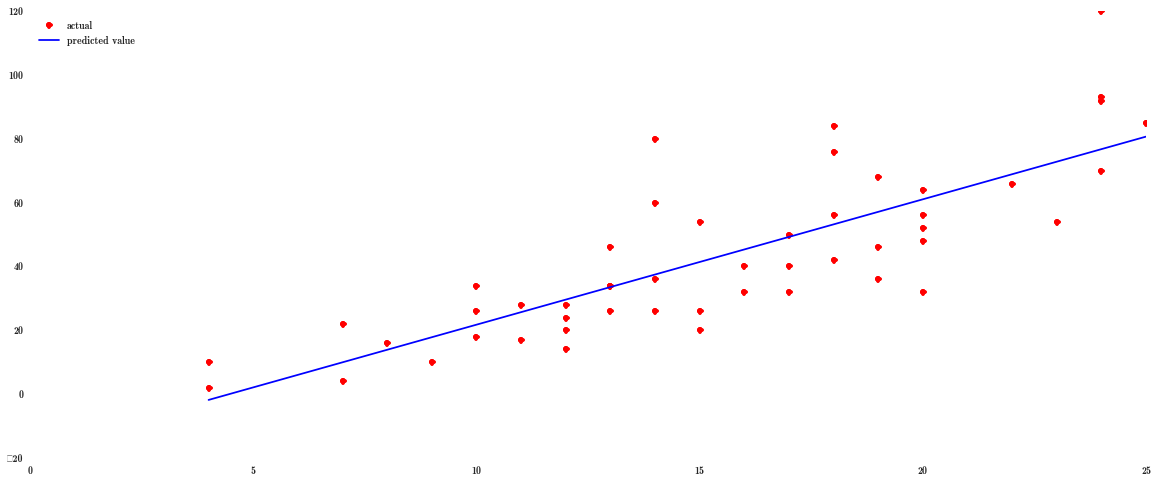

In [88]:
plt.plot(x, y, 'ro', label = 'actual')
plt.plot(x, regr.predict(x), 'blue', label = 'predicted value')
plt.legend(frameon=False, loc='upper left')

In [89]:
regr2 = linear_model.LinearRegression()

In [90]:
df.head()

,speed,dist,speed-sq
0,4,2,16
1,4,10,16
2,7,4,49
3,7,22,49
4,8,16,64


In [91]:
x2 = [[x, y] for x, y in df[['speed','speed-sq']].values]
y = df['dist'].values
regr2.fit(x2, y)


LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

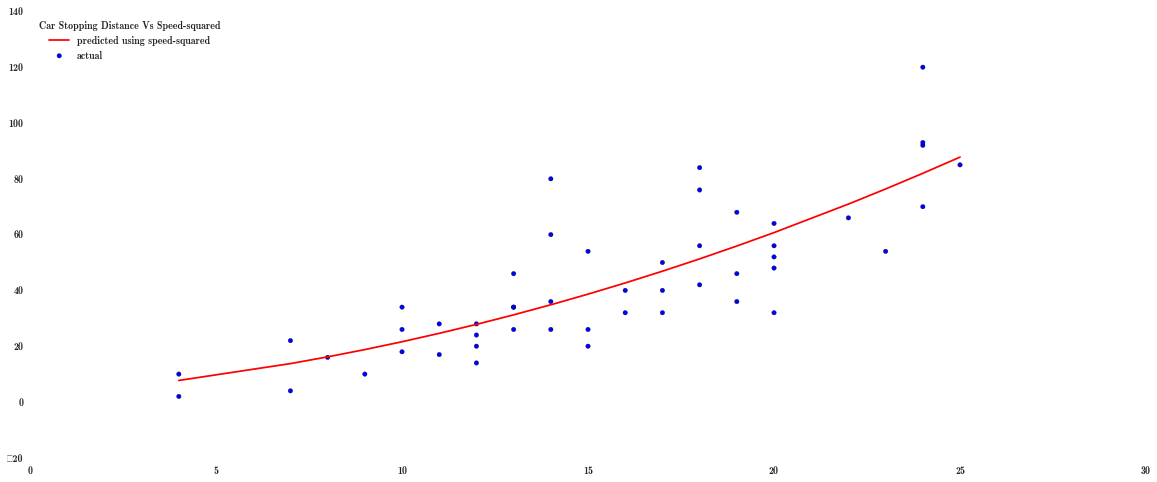

In [92]:
plt.scatter(df['speed'], y, label = 'actual')
plt.plot(df['speed'], regr2.predict(x2), label = 'predicted using speed-squared', color='r')
plt.legend(frameon=False, loc='upper left', title='Car Stopping Distance Vs Speed-squared')
plt.show()

In [93]:
print "coef: %s" %regr2.coef_
print "score: %0.5f" %regr2.score(x2,y)
print "SSE: %0.5f" %np.mean((regr2.predict(x2) - y)**2)

coef: [ 0.91328761  0.0999593 ]
score: 0.66733
SSE: 216.49432


--> by comparing socre and SSE of the regr (using speed as input) and regr1 (using speed-sqaured as input), the 2 models does not have a big difference - regr2 got a bit better score and a bit lower SSE.

In [94]:
# use Ridge regression to build model for the same set of data:

In [95]:
regrR = linear_model.Ridge()

In [96]:
x2 = df[['speed','speed-sq']].values
y = df['dist'].values
regrR.fit(x2, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [97]:
print 'ceof: %s ' %regrR.coef_
print 'score: %.5f' %regrR.score(x2, y)
print 'SSE: %.5f' %np.mean((regrR.predict(x2) - y)**2)

ceof: [ 0.89722445  0.10046945] 
score: 0.66733
SSE: 216.49461


--> by comparing SSE and score, Ridge Regression produce a similar model but got a bit lower in SSE and a bit better score

In [98]:
from sklearn import feature_selection

def f_regression_feature_selection(input, response):    
    return feature_selection.univariate_selection.f_regression(input, response)    

In [99]:
x2 = [[x, y] for x, y in df[['speed','speed-sq']].values]
y = df['dist'].values

In [100]:
f_regression_feature_selection(x2, y)

(array([ 89.56710654,  95.67132858]),
 array([  1.48983650e-12,   5.19997033e-13]))

--> both speed and speed-squared has a low p-value, i.e. good feature for modeling

In [101]:
# Second dataset: Predicting city and Highway MPG

In [102]:
df2 = pd.read_csv('../data/cars93.csv')

In [103]:
print df2.head()

  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8        25   
1        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2         Audi       90  Compact       25.9   29.1       32.3        20   
3         Audi      100  Midsize       30.8   37.7       44.6        19   
4          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags DriveTrain Cylinders  EngineSize  \
0           31                None      Front         4         1.8   
1           25  Driver & Passenger      Front         6         3.2   
2           26         Driver only      Front         6         2.8   
3           26  Driver & Passenger      Front         6         2.8   
4           30         Driver only       Rear         4         3.5   

   Horsepower   RPM  Rev.per.mile Man.trans.avail  Fuel.tank.capacity  \
0         140  6300          2890             Yes

In [140]:
# for cityMPG prediction:

# take away cols that are not yet vectorized
cols_predict_cityMPG = df2.columns.tolist()
cols_predict_cityMPG.remove('MPG.city')
cols_predict_cityMPG.remove('Manufacturer')
cols_predict_cityMPG.remove('Model')
cols_predict_cityMPG.remove('Type')
cols_predict_cityMPG.remove('AirBags')
cols_predict_cityMPG.remove('DriveTrain')
cols_predict_cityMPG.remove('Man.trans.avail')
cols_predict_cityMPG.remove('Origin')
cols_predict_cityMPG.remove('Make')

# create input and response datasets
x = df2[cols_predict_cityMPG].values
y = df2['MPG.city'].values


In [174]:
for col in df2.columns:
    print pd.isnull(col)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [173]:
df2.replace([np.inf, -np.inf], np.nan)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28.0,16,2880,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18.0,6,200,111,74,42,30.5,17,3470,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,6,5.7,180,4000,1320,No,23.0,6,216,116,78,45,30.5,21,4105,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,6,3.8,170,4800,1690,No,18.8,5,198,108,73,41,26.5,14,3495,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,8,4.9,200,4100,1510,No,18.0,6,206,114,73,43,35.0,18,3620,USA,Cadillac DeVille


In [175]:
df2[df2['Cylinders'].isnull()]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make


In [169]:
f_regression_feature_selection(x, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').